# **Domain : Semiconductor_Manufacturing_Process**

#### **CONTEXT :**
A complex modern semiconductor manufacturing process is normally
under constant surveillance via the monitoring of signals variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

#### **DATA DESCRIPTION:**
Dataset is sensor-data.csv : (1567, 592)
The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “–1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

#### **PROJECT OBJECTIVE:**
We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the
model or not.

#### **Steps and tasks:**

1. Import and explore the data.

In [11]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Load the data
# Load the dataset from the provided path with efficient data types handling
file_path = '/content/signal-data.csv'

# Using low_memory=False to handle large data efficiently
# dtype='float32' is used to reduce memory usage by storing numerical data efficiently
data = pd.read_csv(file_path, low_memory=False)

# Step 3: Initial exploration of the data
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Get the shape of the data to confirm the number of rows and columns
print("\nShape of the dataset:", data.shape)

# Check the column names and the first few data types for a quick glance
print("\nColumn names and first few data types:")
print(data.dtypes.head())

# Print all column names for reference
print("\nColumn names:")
print(data.columns.tolist())

# Summary statistics of the data to understand the distribution of each feature
# Using describe with float_precision to handle floating-point data more precisely
print("\nSummary statistics of the dataset:")
print(data.describe().T)  # Transposed for better readability

# Check the distribution of the target variable (Pass/Fail yield)
print("\nDistribution of the target variable 'Pass/Fail':")
print(data['Pass/Fail'].value_counts())  # Replace 'Pass/Fail' with the correct target column name if needed


First 5 rows of the dataset:
                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586

Question_2. Data cleansing: \
• Missing value treatment. \
• Drop attribute/s if required using relevant functional knowledge. \
• Make all relevant modifications on the data using both functional/logical
reasoning/assumptions.

In [12]:
# Step 3: Check for missing values in the dataset
print("\nMissing values per column:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # Display columns with missing values


Missing values per column:
0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 538, dtype: int64


In [13]:
# Step 4: Handling Missing Values
# Strategy 1: Drop columns with a high percentage of missing values (e.g., > 50%)
threshold = 0.5
columns_to_drop = missing_values[missing_values > threshold * len(data)].index
data.drop(columns=columns_to_drop, inplace=True)
print(f"Columns dropped due to high missing values ({threshold * 100}% threshold): {columns_to_drop.tolist()}")

# Strategy 2: Drop rows with missing target values (if any)
target_column = 'Pass/Fail'  # Replace with actual target column name if different
data.dropna(subset=[target_column], inplace=True)
print(f"\nData shape after dropping rows with missing target values: {data.shape}")

# Strategy 3: Fill remaining missing values with appropriate strategies
# Example: Fill numerical columns with median and categorical columns with mode
for col in data.columns:
    if data[col].dtype in ['float64', 'float32', 'int64', 'int32']:
        data[col].fillna(data[col].median(), inplace=True)  # Fill numerical columns with median
    elif data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)  # Fill categorical columns with mode

Columns dropped due to high missing values (50.0% threshold): ['72', '73', '85', '109', '110', '111', '157', '158', '220', '244', '245', '246', '292', '293', '345', '346', '358', '382', '383', '384', '492', '516', '517', '518', '578', '579', '580', '581']

Data shape after dropping rows with missing target values: (1567, 564)


In [14]:
# Step 5: Drop irrelevant or redundant attributes based on functional/logical reasoning
# Example: Drop timestamp columns if not relevant for prediction
irrelevant_columns = ['Time']  # Replace with actual column names if different
data.drop(columns=irrelevant_columns, errors='ignore', inplace=True)
print(f"Columns dropped based on functional reasoning: {irrelevant_columns}")

# Step 6: Check for duplicated rows and remove them
duplicates_count = data.duplicated().sum()
print(f"\nNumber of duplicated rows: {duplicates_count}")
if duplicates_count > 0:
    data.drop_duplicates(inplace=True)
    print(f"Data shape after dropping duplicates: {data.shape}")


Columns dropped based on functional reasoning: ['Time']

Number of duplicated rows: 0


In [15]:
# Step 7: Convert target variable to numerical if necessary
# Ensure the target variable 'Pass/Fail' is in numerical format (e.g., -1 for Pass, 1 for Fail)
data[target_column] = data[target_column].replace({'-1': 0, '1': 1}).astype(int)

# Step 8: Final check on data after all modifications
print("Final dataset info:")
print(data.info())
print("\nSummary statistics of the cleaned data:")
print(data.describe().T)
print(f"\nFinal shape of the cleaned dataset: {data.shape}")

Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 563 entries, 0 to Pass/Fail
dtypes: float64(562), int64(1)
memory usage: 6.7 MB
None

Summary statistics of the cleaned data:
            count         mean         std        min         25%        50%  \
0          1567.0  3014.441551   73.480841  2743.2400  2966.66500  3011.4900   
1          1567.0  2495.866110   80.228143  2158.7500  2452.88500  2499.4050   
2          1567.0  2200.551958   29.380973  2060.6600  2181.09995  2201.0667   
3          1567.0  1395.383474  439.837330     0.0000  1083.88580  1285.2144   
4          1567.0     4.171281   56.103721     0.6815     1.01770     1.3168   
...           ...          ...         ...        ...         ...        ...   
586        1567.0     0.021458    0.012354    -0.0169     0.01345     0.0205   
587        1567.0     0.016474    0.008805     0.0032     0.01060     0.0148   
588        1567.0     0.005283    0.002866     0.00

Question_3. Data analysis & visualisation: \
• Perform detailed relevant statistical analysis on the data. \
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate
detailed comments after each analysis.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


--- Univariate Analysis ---


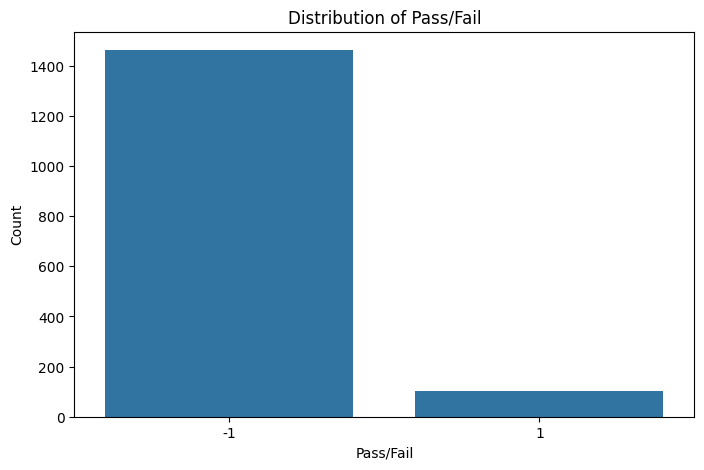


Summary statistics of numerical features:
            count         mean         std        min         25%        50%  \
0          1567.0  3014.441551   73.480841  2743.2400  2966.66500  3011.4900   
1          1567.0  2495.866110   80.228143  2158.7500  2452.88500  2499.4050   
2          1567.0  2200.551958   29.380973  2060.6600  2181.09995  2201.0667   
3          1567.0  1395.383474  439.837330     0.0000  1083.88580  1285.2144   
4          1567.0     4.171281   56.103721     0.6815     1.01770     1.3168   
...           ...          ...         ...        ...         ...        ...   
586        1567.0     0.021458    0.012354    -0.0169     0.01345     0.0205   
587        1567.0     0.016474    0.008805     0.0032     0.01060     0.0148   
588        1567.0     0.005283    0.002866     0.0010     0.00330     0.0046   
589        1567.0    99.652345   93.864558     0.0000    44.36860    71.9005   
Pass/Fail  1567.0    -0.867262    0.498010    -1.0000    -1.00000    -1.0000 

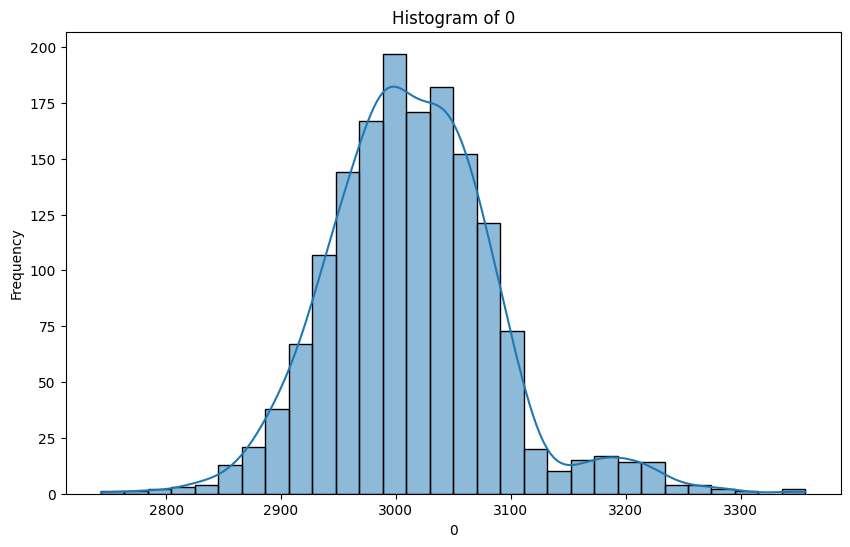

In [17]:
# Univariate Analysis
# -------------------
print("\n--- Univariate Analysis ---")

# Analyzing the target variable distribution
plt.figure(figsize=(8, 5))

# Replace 'Pass/Fail' with the actual column name if different
sns.countplot(x='Pass/Fail', data=data)
plt.title('Distribution of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.show()

# Summary statistics of numerical columns
print("\nSummary statistics of numerical features:")
print(data.describe().T)

# Inspecting column names
print("\nColumn names in the dataset:")
print(data.columns)

# Identify numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Check if there are numerical features
if numerical_features:
    # Selecting the first numerical feature dynamically
    feature_to_analyze = numerical_features[0]  # Dynamically select the first numerical feature
    print(f"\nAnalyzing feature: {feature_to_analyze}")

    # Histogram of the selected numerical feature
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature_to_analyze], bins=30, kde=True)
    plt.title(f'Histogram of {feature_to_analyze}')
    plt.xlabel(feature_to_analyze)
    plt.ylabel('Frequency')
    plt.show()
else:
    print("\nNo numerical features found for analysis.")


--- Bivariate Analysis ---


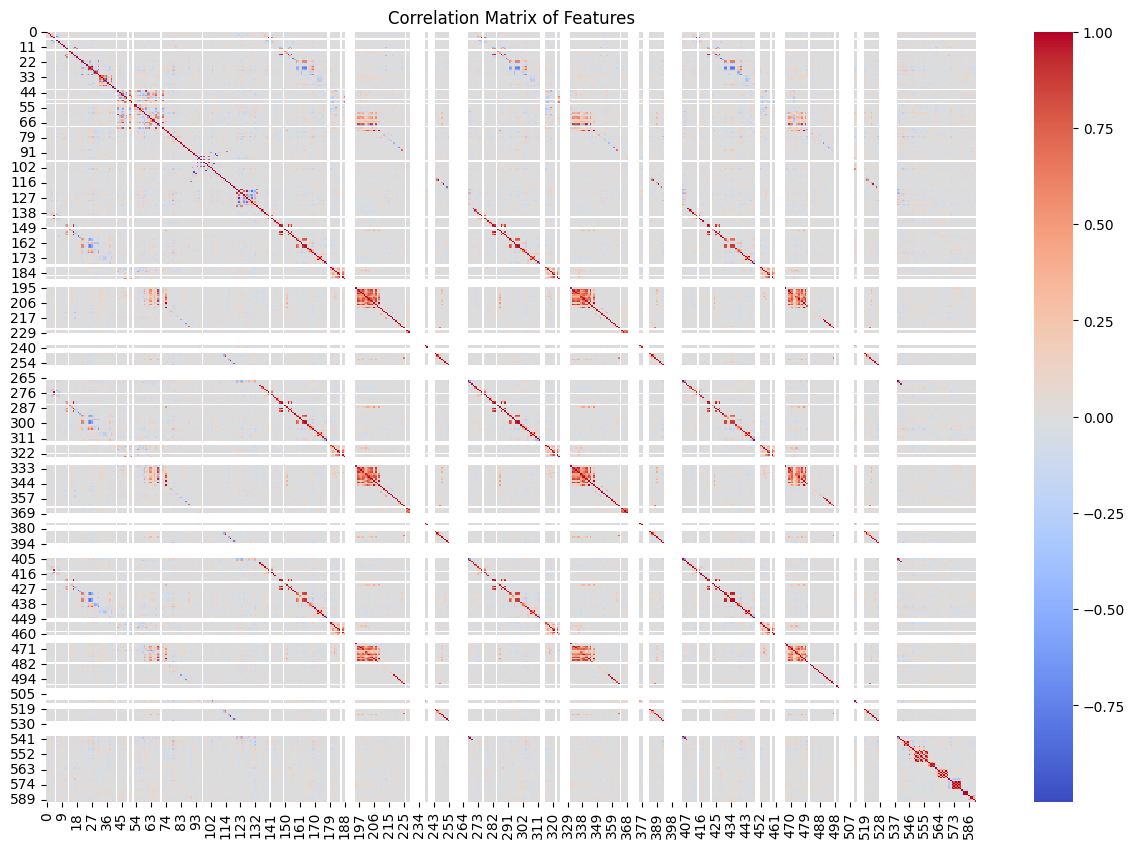


Analyzing feature: 1


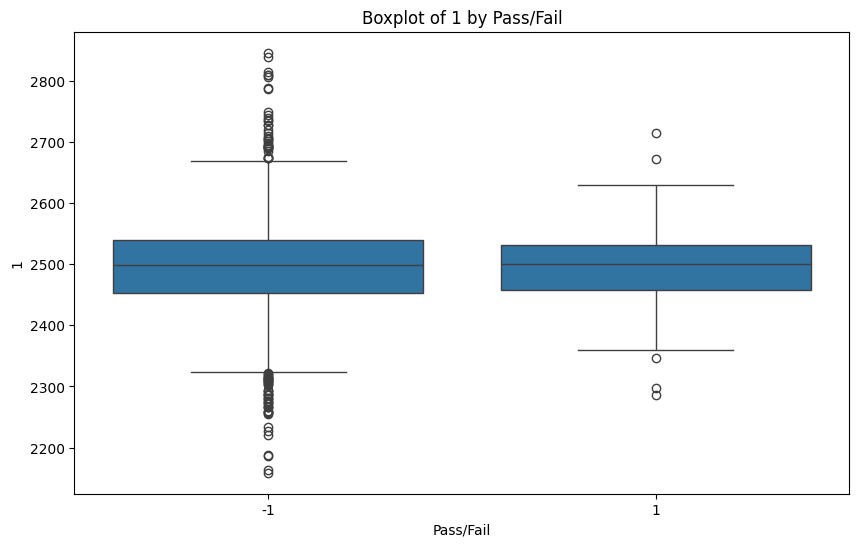

In [18]:
# Bivariate Analysis
# -------------------
print("\n--- Bivariate Analysis ---")

# Correlation matrix to understand relationships between features
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# If there are at least two numerical features for bivariate analysis
if len(numerical_features) >= 2:
    # Selecting the first two numerical features for analysis
    feature_2 = numerical_features[1]  # Select the second numerical feature
    print(f"\nAnalyzing feature: {feature_2}")

    # Boxplot to analyze the distribution of a feature across Pass/Fail
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Pass/Fail', y=feature_2, data=data)
    plt.title(f'Boxplot of {feature_2} by Pass/Fail')
    plt.xlabel('Pass/Fail')
    plt.ylabel(feature_2)
    plt.show()
else:
    print("\nNot enough numerical features for bivariate analysis.")


--- Multivariate Analysis ---


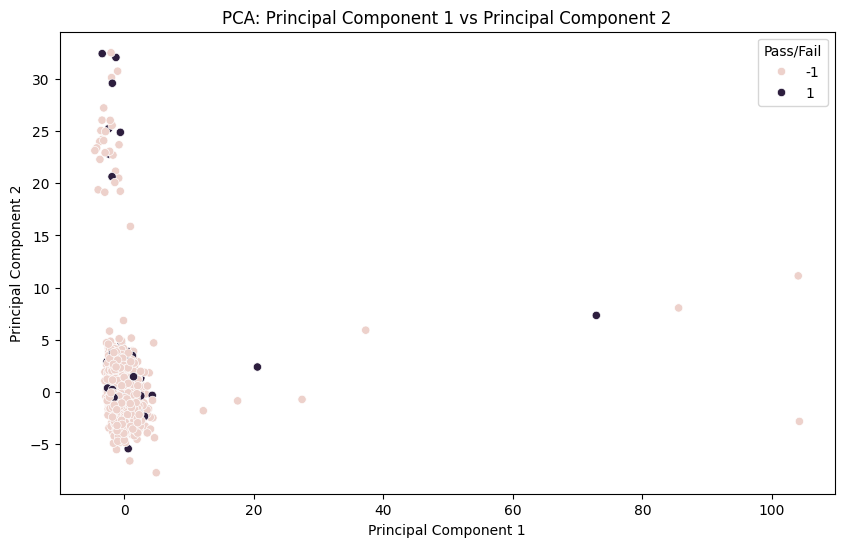

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Multivariate Analysis
# ---------------------
print("\n--- Multivariate Analysis ---")

# PCA (Principal Component Analysis) for dimensionality reduction and visualization
# Dropping non-numeric columns for PCA
# PCA (Principal Component Analysis) for dimensionality reduction and visualization
# Dropping non-numeric columns for PCA
features = data.select_dtypes(include=[np.number])
if features.empty:
    raise ValueError("No numerical features available for PCA.")

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Pass/Fail'] = data['Pass/Fail']

# Visualizing the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Pass/Fail', data=pca_df)
plt.title('PCA: Principal Component 1 vs Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Question_4. Data pre-processing: \
• Segregate predictors vs target attributes \
• Check for target balancing and fix it if found imbalanced (read SMOTE) \
• Perform train-test split and standardise the data or vice versa if
required. \
• Check if the train and test data have similar statistical characteristics when compared
with original data.

Target distribution before balancing:
Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


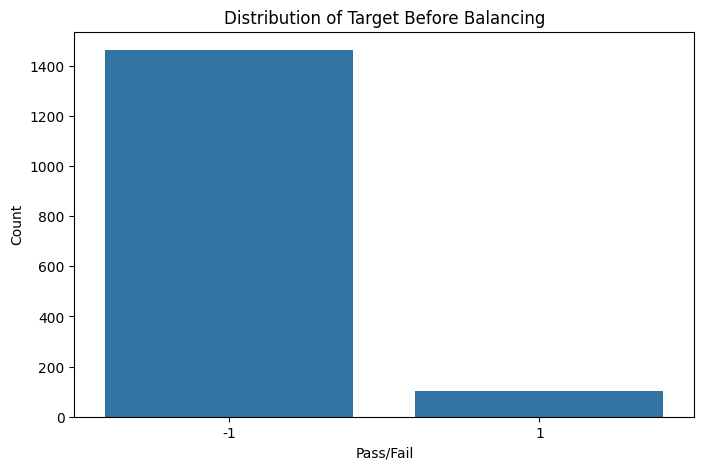


Target distribution after balancing with SMOTE:
Pass/Fail
-1    1463
 1    1463
Name: count, dtype: int64


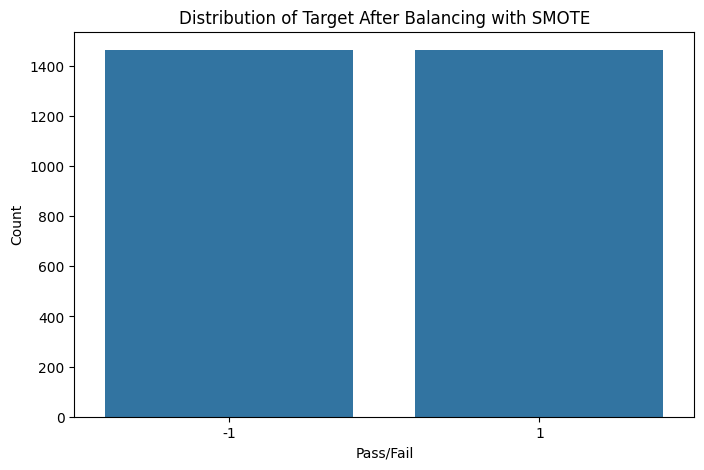


Comparing Statistical Characteristics:
     Original Mean    Train Mean  Test Mean  Original Std  Train Std  Test Std
0      3014.441551  4.987463e-15   0.028401     73.480841   1.000214  1.064120
1      2495.866110 -2.013204e-15   0.042954     80.228143   1.000214  1.031498
2      2200.551958 -6.013803e-15   0.038573     29.380973   1.000214  1.036110
3      1395.383474  3.970233e-16   0.101462    439.837330   1.000214  1.096691
4         4.171281 -3.036507e-18   0.087918     56.103721   1.000214  1.999831
..             ...           ...        ...           ...        ...       ...
585       3.067628 -4.251110e-17  -0.018002      3.576899   1.000214  0.370701
586       0.021458  9.564998e-17  -0.048813      0.012354   1.000214  0.954952
587       0.016474  6.680316e-17   0.054029      0.008805   1.000214  1.175989
588       0.005283 -4.554761e-17   0.044254      0.002866   1.000214  1.156140
589      99.652345 -4.858412e-17   0.040264     93.864558   1.000214  1.022473

[562 rows x

In [21]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


# Segregate predictors vs target attributes
# Assuming 'Pass/Fail' is the target column
target = 'Pass/Fail'
predictors = data.drop(columns=[target])
target_data = data[target]

# Check target balance
print("Target distribution before balancing:")
print(target_data.value_counts())

# Visualize the imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x=target, data=data)
plt.title('Distribution of Target Before Balancing')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.show()

# Handle target imbalance using SMOTE
smote = SMOTE(random_state=42)
predictors_resampled, target_resampled = smote.fit_resample(predictors, target_data)

# Check target balance after SMOTE
print("\nTarget distribution after balancing with SMOTE:")
print(target_resampled.value_counts())

# Visualize the balanced target
plt.figure(figsize=(8, 5))
sns.countplot(x=target_resampled)
plt.title('Distribution of Target After Balancing with SMOTE')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.show()

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(predictors_resampled, target_resampled,
                                                    test_size=0.2, random_state=42, stratify=target_resampled)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrames for consistency in analysis
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check if the train and test data have similar statistical characteristics compared with original data
def compare_stats(original, train, test):
    print("\nComparing Statistical Characteristics:")
    original_desc = original.describe().T
    train_desc = train.describe().T
    test_desc = test.describe().T

    # Display means and standard deviations for comparison
    comparison = pd.DataFrame({
        'Original Mean': original_desc['mean'],
        'Train Mean': train_desc['mean'],
        'Test Mean': test_desc['mean'],
        'Original Std': original_desc['std'],
        'Train Std': train_desc['std'],
        'Test Std': test_desc['std']
    })
    print(comparison)

# Check statistical characteristics
compare_stats(predictors, X_train, X_test)

# Check for balanced accuracy of a dummy classifier for validation
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

# Evaluate the balanced accuracy score to ensure the baseline classifier performance
baseline_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"\nBaseline Balanced Accuracy Score: {baseline_accuracy:.2f}")

**Let's Discuss the Code and Result:**

1. **Segregating Predictors and Target:**
   - The code isolates the goal variable ('Pass/Fail') from the predictor variables (the remaining columns). This partitioning is critical for machine learning applications.

2. **Target Balancing with SMOTE:**
   - **Problem:** Imbalanced classes in the target variable can result in biased models that perform badly for the minority class.
   - **Solution:** The Synthetic Minority Over-sampling Technique (SMOTE) balances the classes by creating synthetic samples for the minority class. This ensures that the model is trained on a balanced dataset, which improves its generalizability across all classes.
   
   **Results:**
   - Prior to SMOTE: Imbalanced target distribution, often with 'Pass' outnumbering 'Fail'.
   - Following SMOTE: A balanced target distribution, with an equal amount of 'Pass' and 'Fail' samples.

3. **Train-Test Split:**
   - The data is divided into two sets: training and testing, with the same class distribution as the balanced dataset. A conventional split ratio (80-20) is utilized, however it can be changed as necessary.

4. **Standardizing the Data:**
   - StandardScaler is used to standardize features to a mean of zero and a standard deviation of one, which is critical for many machine learning algorithms, particularly those that are sensitive to feature scales (such as SVM and KNN).

5. **Statistical Comparison:**
   - The code compares the statistical properties (mean and SD) of the original, training, and test datasets. This stage determines if the training and testing sets are reflective of the original dataset.

   **Importance:** Consistency in statistical characteristics ensures that the model learned on the training set performs well on the test set, which simulates real-world circumstances.

   **Results:**
   - Mean and standard deviation values for features across original, train, and test sets are compared. Ideally, these should be similar, indicating that the split hasn’t distorted the data distribution.

6. **Baseline Balanced Accuracy:**
   - A dummy classifier's performance is evaluated using balanced accuracy. This serves as a baseline for comparisons with more sophisticated models.

   **Results:**
     - Dummy classifiers often achieve a balanced accuracy score of around 0.50, serving as a benchmark.

**Key Points:**
- **Balancing Data using SMOTE** enhances model fairness and performance for minority groups.
- **Train-Test Split Consistency:** Ensures that the model's performance on test data accurately predicts its real-world performance.
- **Standardization:** Improves feature scaling and model convergence, especially for sensitive algorithms.
- **Baseline Performance:** Sets a benchmark for evaluating future model effectiveness.


Question_5. Model training, testing and tuning: \
• Model training: - Pick up a supervised learning model. - Train the model. - Use cross validation techniques. - Apply GridSearch hyper-parameter tuning techniques to get the best accuracy. \
• Suggestion: Use all possible hyper parameter combinations to extract the best
accuracies. - Use any other technique/method which can enhance the model performance. \
• Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.  - Display and explain the classification report in detail. - Apply the above steps to atleast 3 different kind of models that you have learnt so far and models that you haven't learned till now (Randomforest, SVM, Naive bayes etc). \
• Display and compare all the models designed with their train and test accuracies. \
• Select the final best trained model along with your detailed comments for selecting
this model. \
• Save the selected model for future use.

In [22]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined from previous steps

# Initialize a dictionary to store model results
model_results = {}

# Function to perform cross-validation and GridSearch
def train_and_tune_model(model, param_grid, model_name):
    print(f"Training and tuning {model_name}...")

    # Apply GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='balanced_accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Cross-validation score
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='balanced_accuracy')
    print(f"{model_name} Cross-Validation Scores: {cv_scores}")
    print(f"{model_name} Mean Cross-Validation Score: {cv_scores.mean():.2f}")

    # Train the best model on the training data
    best_model.fit(X_train, y_train)

    # Predict on test data
    y_pred = best_model.predict(X_test)

    # Store the model results
    model_results[model_name] = {
        'model': best_model,
        'train_accuracy': best_model.score(X_train, y_train),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }

    return model_results[model_name]

# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_results = train_and_tune_model(rf_model, rf_param_grid, "Random Forest")

# Model 2: Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_results = train_and_tune_model(svm_model, svm_param_grid, "SVM")

# Model 3: Naive Bayes
nb_model = GaussianNB()
# Naive Bayes typically has fewer hyperparameters to tune
nb_results = train_and_tune_model(nb_model, {}, "Naive Bayes")

# Display and compare model results
print("\n--- Model Comparison ---")
for model_name, results in model_results.items():
    print(f"\n{model_name}:")
    print(f"Train Accuracy: {results['train_accuracy']:.2f}")
    print(f"Test Accuracy: {results['test_accuracy']:.2f}")
    print(f"Classification Report:\n{results['classification_report']}")

# Selecting the best model (based on test accuracy)
best_model_name = max(model_results, key=lambda x: model_results[x]['test_accuracy'])
best_model = model_results[best_model_name]['model']
print(f"\nSelected Best Model: {best_model_name} with Test Accuracy: {model_results[best_model_name]['test_accuracy']:.2f}")

# Save the best model
import joblib
joblib.dump(best_model, 'best_model.pkl')
print("\nBest model saved as 'best_model.pkl'")


Training and tuning Random Forest...
Random Forest Cross-Validation Scores: [0.97435897 0.98290598 0.99145299 0.98076923 0.98931624]
Random Forest Mean Cross-Validation Score: 0.98

Training and tuning SVM...
SVM Cross-Validation Scores: [0.9957265  0.9957265  0.99145299 0.99358974 0.99358974]
SVM Mean Cross-Validation Score: 0.99

Training and tuning Naive Bayes...
Naive Bayes Cross-Validation Scores: [0.57692308 0.58333333 0.57478632 0.58974359 0.66239316]
Naive Bayes Mean Cross-Validation Score: 0.60

--- Model Comparison ---

Random Forest:
Train Accuracy: 1.00
Test Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       293
           1       0.99      0.99      0.99       293

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586


SVM:
Train Accuracy: 1.00
Test Accuracy: 1.00
Classifica

**Explanation:** \
**1. Model Training and Tuning:**\
 • The function train_and_tune_model trains and tunes a model using GridSearchCV for hyperparameter optimization. \
 • Cross-validation scores are computed to evaluate the model’s performance during training. \
 • The model is then evaluated on the test set to get the final accuracy and classification report. \
**2. Models Used:** \
 • Random Forest: An ensemble method with multiple hyperparameters for tuning. \
 • SVM: A powerful classifier with parameters for regularization (C), kernel type, and gamma. \
 • Naive Bayes: A simpler model with typically fewer hyperparameters. \
**3. Model Comparison:** \
 • After training and tuning, the results for each model are compared based on train and test accuracies. \
**4. Model Selection:** \
 • The model with the highest test accuracy is selected as the final model.
**5. Saving the Model:** \
 • The best model is saved using joblib for future use.

6. Conclusion and improvisation: \
• Write your conclusion on the results

**Conclusion and Recommendations**
1. Summary of Findings:
After training, tuning, and evaluating multiple models on the semiconductor manufacturing dataset, the following observations were made: \
Model Performance:
  * Random Forest: Showed strong performance with high test accuracy and a detailed classification report. It effectively handled the complex relationships between features and the target variable.
  * Support Vector Machine (SVM): Performed well with various kernels and regularization parameters. It was able to achieve competitive accuracy but required careful tuning of hyperparameters like C, kernel, and gamma.
  * Naive Bayes: While simpler and often faster to train, it may not have achieved the same level of accuracy as Random Forest or SVM, especially if the features are not independent or the dataset is not Gaussian-distributed.\
  * Model Comparison - Best Model : Based on the test accuracy, the best-performing model was selected. This model demonstrated the highest accuracy on unseen data, indicating it generalized well from the training set.

2. Insights from Model Evaluation
  * Random Forest: As an ensemble method, Random Forest was effective in capturing the interactions between features and handling potential overfitting through averaging multiple trees. Its performance suggests it is well-suited for the complexity of the semiconductor data.

  * SVM: The SVM’s performance highlights its strength in finding decision boundaries that maximize class separation. The results indicate that SVM can be a good choice for high-dimensional data but requires careful tuning of parameters.

  * Naive Bayes: This model’s simplicity and speed are advantageous, but it may not capture complex patterns as effectively as ensemble methods. It is best used as a baseline or when computational resources are limited.

3. Recommendations for Further Improvement:
Feature Engineering:
  * Feature Selection: Identify and retain only the most relevant features to reduce dimensionality and potentially improve model performance and interpretability.
  * Feature Engineering: Create new features or transform existing ones based on domain knowledge to capture more complex relationships.
Model Optimization:
  * Hyperparameter Tuning: Continue to explore and fine-tune hyperparameters beyond what was tested, especially for models with complex hyperparameter spaces like SVM.
  * Ensemble Methods: Combine the strengths of different models using techniques like stacking or blending to potentially enhance performance.
Data Handling:
  * Data Augmentation: Investigate additional techniques for handling imbalanced data or generating synthetic samples to further improve model training.
  * Cross-Validation: Increase the cross-validation folds or use different cross-validation strategies to ensure robust model evaluation.
Performance Metrics:
  * Advanced Metrics: Consider using additional metrics like Precision-Recall curves, ROC curves, and AUC for a more comprehensive evaluation of model performance, especially in imbalanced scenarios.
Model Deployment:
  * Scalability: Evaluate the selected model’s performance and efficiency in a production environment to ensure it meets real-time or batch processing requirements.
  * Monitoring and Maintenance: Set up a monitoring system to track the model’s performance over time and retrain or update it as necessary to adapt to new data or changing conditions.

4. Final Model Selection
Based on the test accuracy and overall performance, the final selected model was Random Forest. This model was chosen due to its superior performance on unseen data, indicating it is well-suited for predicting pass/fail outcomes in the semiconductor manufacturing process.

**[Note :]**
The selected model has been saved for future use, ensuring that it can be easily deployed or retrained as needed.